# Tic Tac Toe Machine - Using Quantum Computation

#### Contributors:
Hemanth Kumar J <br>
Anish Sharma<br>
Arjun Syam<br>
Dev Sony<br>
Namburi Soujanya<br>
Adil Chery<br>

A qiskit implementation of the classic game of Tic Tac Toe using quantum simulators which can be migrated to run on quantum computers.

In [131]:
# importing Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit

#importing the Oracle circuit builder
from qiskit.circuit.library import PhaseOracle

# import basic plot tools
from qiskit.visualization import plot_histogram

### Initialization
We start with initializing the qubits with all states having equal amplitudes using Hadamard Gates.

In [132]:
def initialize_s(qc, n):
    for q in list(range(n)):
        qc.h(q)

### Diffuser
Grovers algorithm works by applying an Oracle reflection and a diffuser amplitude amplification around $\sqrt{n}$ times to search for a particular state.<br>
We define the diffuser function here which amplifies the negated state that the Oracle has prepared.

In [133]:
# Multicontrolled z-gate subroutine that applies the gate to the circuit based on the control and target qubits
def multicontrolled_z(qc, control, target):
    qc.h(target)
    qc.mct(control, target)
    qc.h(target)

# Actual diffuser function that applies the diffuser to the circuit
def diffuser(qc):
    for qubit in range(10):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, list(range(9)), 9)

    for qubit in range(10):
        qc.x(qubit)
        qc.h(qubit)

### Oracle and the completed circuit
We continue to build the Oracle using the PhaseOracle method, using the winning clause expressions to determine the winning state.<br>
All these pieces are finally put together to run the Grover's algorithm 3 times(since we use 9 qubits, 1 for each space on the board)

In [134]:
circuit = QuantumCircuit(10, 9)

# Expression defining all the winning states
expression = '(x1 & x2 & x3) ^ (y1 & y2 & y3) ^ (z1 & z2 & z3) ^ (x1 & y1 & z1) ^ (x2 & y2 & z2) ^ (x3 & y3 & z3) ^ (x1 & y2 & z3) ^ (x3 & y2 & z1)'

initialize_s(circuit, 10)

for i in range(3):
    circuit.barrier(list(range(10)))

    circuit.append(PhaseOracle(expression), list(range(9)))

    circuit.barrier(list(range(10)))

    diffuser(circuit)


# Output
circuit.measure(list(range(9)), list(range(9)))
#circuit.measure([9], [8])

The circuit used for this algorithm is drawn below.

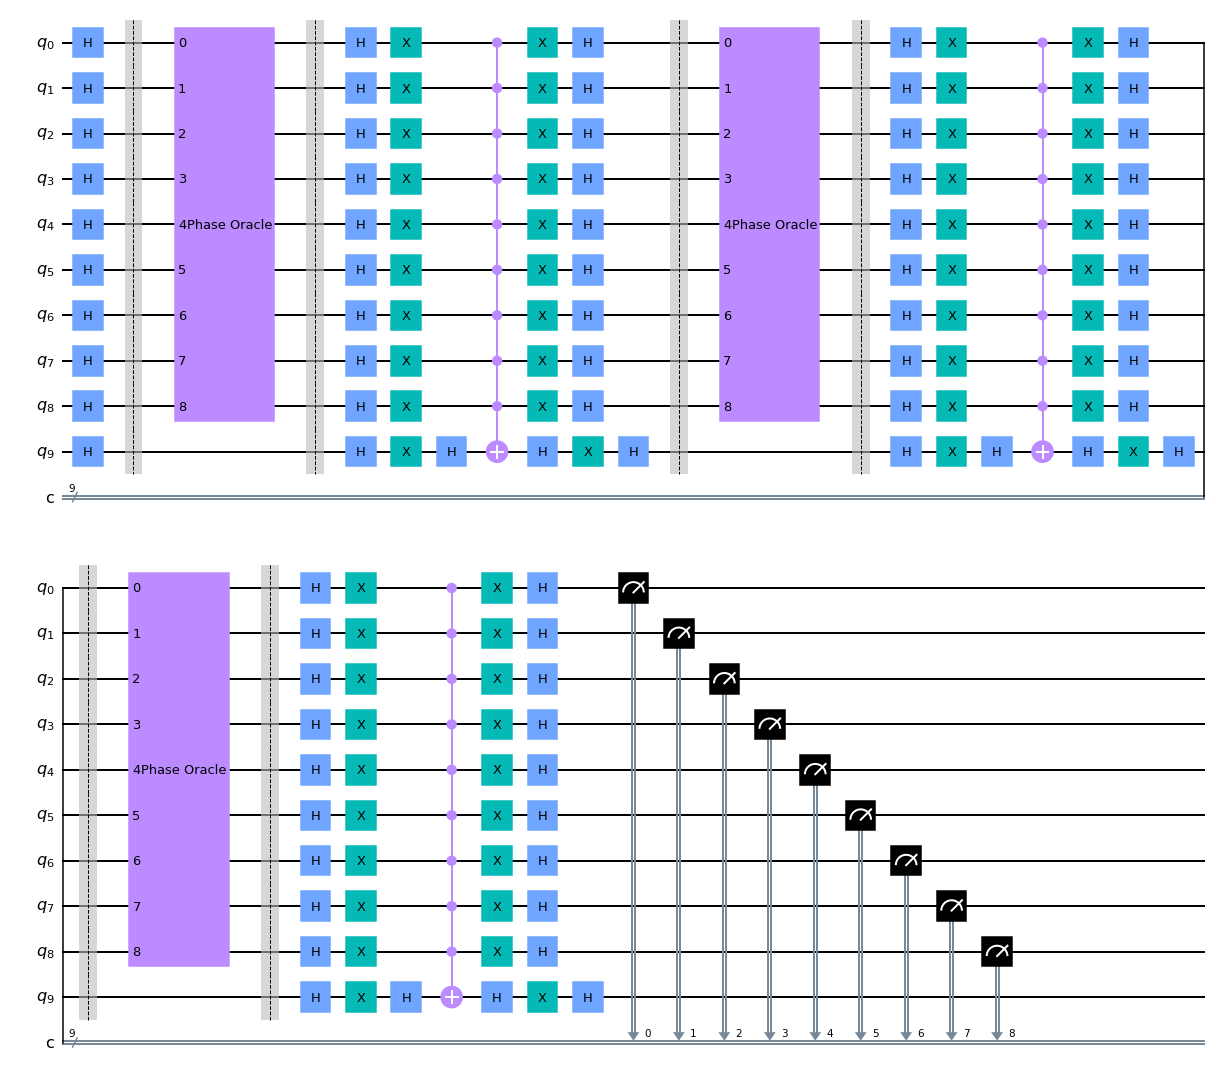

In [135]:
circuit.draw(output='mpl')

### Output
We finally run the quantum circuit on the "aer_simulator" provided by qiskit to simulate a quantum circuit and observe the output using histograms.

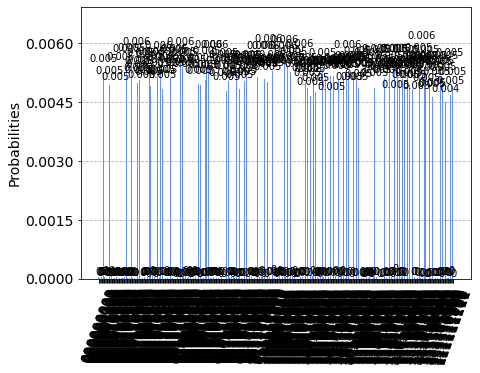

In [136]:
N = 100000  #Since we encounter random outputs due to the nature of the algorithm, we average the outcomes of N shots
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=N).result()
counts = results.get_counts()
plot_histogram(counts)

To further analyse the output we received, we plot the histogram as a bar graph.<br>
The results containing the higher outcomes represent the winning states while the ones having lower/zero outcomes represent the losing/tied states.

array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

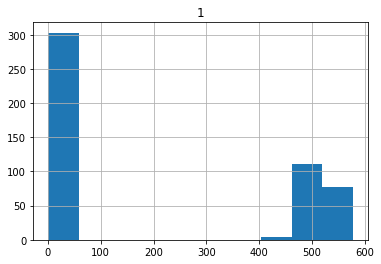

In [137]:
import pandas as pd
df = pd.DataFrame(counts.items())
df = df.sort_values(by=1, ascending=False)

df.hist()

In [138]:
print(df)

             0    1
8    111010011  577
114  011111000  571
165  100010001  567
239  001110101  563
208  000110111  563
..         ...  ...
352  100000100    1
318  011001010    1
158  011100110    1
391  110000011    1
494  101000011    1

[495 rows x 2 columns]


             0    1
8    111010011  577
114  011111000  571
165  100010001  567
239  001110101  563
208  000110111  563
..         ...  ...
3    111100000  462
260  110101110  458
202  111001100  456
105  101010100  454
194  111110100  450

[192 rows x 2 columns]


array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

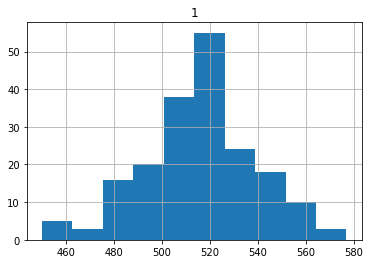

In [139]:
df1 = df.copy(deep = True)
df1 = df1[df1[1] > N/1000]
print(df1)
df1.hist()

Hence, the problem is solved